In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Logistic Regression using pytorch
linear regression + logistic function(softmax) = logistic regression

### Steps for Logistic regression
A. Preparing the Data set
1. Import libraries
2. We use MNIST dataset.
3. There are 28*28 images and 10 labels from 0 to 9
4. Data is not normalized so we divide each image to 255 that is basic normalization for images.
5. use train_test_split method from sklearn library
6. Create feature and target tensors
7. epoch: 1 epoch means training all samples one time.
8. batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a     same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
9. Therefore, 1 epoch(training data only once) takes 336 iteration
10. TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
11. DataLoader(): It combines dataset and sampler. It also provides multi process iterators over the dataset.

B. Creating the Logistic model

C. Instantiate Model class

    input_dim = 28,28 # size of image px,px
    output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9
    create model

D. Instantiate Loss class

    Cross entropy loss
    It calculates loss that is not surprise :)
    It also has softmax(logistic function) in it.

E. Instantiate optimizer class
    SGD Optimizer

F. Traning the Model

G. Prediction

In [6]:
# Prepare the dataset
train=pd.read_csv("D:\\Data Science\\DeepLearning\\all\\train.csv",dtype = np.float32)

#splitting the data in to features(X) and labels(Y)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [16]:
# converting the numpy data frame to features and target Tensors

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [8]:
# batch size and iterations
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [13]:
len(features_train), train.shape, train.columns

(33600,
 (42000, 785),
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785))

In [37]:
# Tensor Dataset and Tensor data loader

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

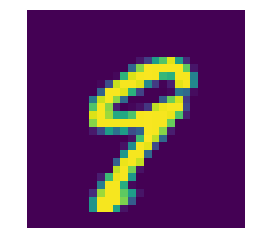

In [23]:
# sample visualization of single data point
# using numpy data point
plt.imshow(features_numpy[11].reshape(28,28))
plt.axis("off")
plt.show()

C:\Users\hemanth\Anaconda3\lib\site-packages\torch\tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


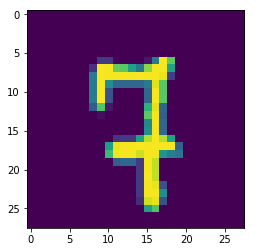

In [24]:
# using the Tensor featuresTrain to visualise the data point
plt.imshow(featuresTrain[11].resize(28,28))
plt.show()

## Creating a Logistic model


In [38]:
class LogisticRegressionModel(nn.Module):
    
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        # Logistic function is implemented at loss function or inbulit so will implement there
    def forward(self,x):
        out=self.linear(x)
        return out

In [39]:
input_dim=28*28
output_dim=10

In [40]:
# Create a logistic regression model
model= LogisticRegressionModel(input_dim,output_dim)
error= nn.CrossEntropyLoss()

learning_rate=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [42]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.822788953781128  Accuracy: 67%
Iteration: 1000  Loss: 1.592555284500122  Accuracy: 74%
Iteration: 1500  Loss: 1.2994662523269653  Accuracy: 78%
Iteration: 2000  Loss: 1.2022182941436768  Accuracy: 79%
Iteration: 2500  Loss: 1.0183779001235962  Accuracy: 81%
Iteration: 3000  Loss: 0.9255053997039795  Accuracy: 81%
Iteration: 3500  Loss: 0.8991302251815796  Accuracy: 82%
Iteration: 4000  Loss: 0.7588906288146973  Accuracy: 83%
Iteration: 4500  Loss: 0.9758384823799133  Accuracy: 83%
Iteration: 5000  Loss: 0.7925894856452942  Accuracy: 84%
Iteration: 5500  Loss: 0.7547786831855774  Accuracy: 84%
Iteration: 6000  Loss: 0.8685271739959717  Accuracy: 84%
Iteration: 6500  Loss: 0.6683892607688904  Accuracy: 84%
Iteration: 7000  Loss: 0.7118467688560486  Accuracy: 85%
Iteration: 7500  Loss: 0.6340833306312561  Accuracy: 85%
Iteration: 8000  Loss: 0.7346197366714478  Accuracy: 85%
Iteration: 8500  Loss: 0.5471299886703491  Accuracy: 85%
Iteration: 9000  Loss: 0.657743453

## testing the model with Test data set 

#### before proceding with test we need to normalize and prepare the data set

In [51]:
# Prepare the dataset
testsample=pd.read_csv("D:\\Data Science\\DeepLearning\\all\\test.csv",dtype = np.float32)


In [52]:
testsample.shape

(28000, 784)

In [54]:

#splitting the data in to features(X) and labels(Y)

features_numpy_test = testsample.loc[:,train.columns != "label"].values/255

In [55]:
# numpy to Tensor

features_tensor_test = torch.from_numpy(features_numpy_test)

In [57]:
output_test = model(features_tensor_test)

In [59]:
predicted_test = torch.max(output_test.data, 1)[1]

In [67]:
numpy_predicted=predicted_test.numpy()

In [114]:
df=pd.DataFrame(numpy_predicted)

In [115]:
predicted_test.shape

torch.Size([28000])

In [116]:
df.rename(columns = {0:'Label'}, inplace = True)

In [120]:
a=np.arange(1,28001)

In [121]:
df2=pd.DataFrame(a)

In [126]:
df2=df2.rename(columns={0:'ImageId'})

In [124]:
df2['Label']=pd.Series(df['Label'])

In [132]:
df2.to_csv("Submission_format.csv",index=False)